## Packages

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Resources
General: 
- Hands on Machine Learning with scikit-learn and tensorflow, chapter 5, 6, 7

- Machine Learnia : https://www.youtube.com/watch?v=w_bLGK4Pteo


Decision Trees: 
- https://scikit-learn.org/stable/modules/tree.html
- https://www.lovelyanalytics.com/2016/08/16/decision-tree-comment-ca-marche/
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://www.youtube.com/watch?v=sgQAhG5Q7iY

Random Forests:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://www.youtube.com/watch?v=v6VJ2RO66Ag

SVM: 
- https://scikit-learn.org/stable/modules/svm.html
- https://towardsdatascience.com/a-brief-introduction-to-support-vector-machine-adf0f103a80f
- https://www.youtube.com/watch?v=_YPScrckx28
- https://www.youtube.com/watch?v=Q7vT0--5VII

Learning Curves: 
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
- https://towardsdatascience.com/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

Validation Curves 
- https://scikit-learn.org/stable/modules/learning_curve.html

- Take some time to read book sections for decision tree, random forest and SVM algorithms.
- Import these algorithms from scikit-learn and find the hyperparameter options that are available when they are instantiated.


## Decision trees

Explain here how they work in your own words:
Model that can perform both classification and regression.

In [27]:
from sklearn import datasets


# Load dataset
iris = datasets.load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

features_names = iris.feature_names[2:]
target_names = iris.target_names

# check if the data is balanced

pd.Series(y).value_counts()

0    50
1    50
2    50
dtype: int64

In [28]:
# Train a decision tree with max_depth=2
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
X_copy = X[:]
y_copy = y[:]
tree_clf.fit(X_copy, y_copy)

DecisionTreeClassifier(max_depth=2)

### Visualization: export_graphviz

In [29]:
# Visualize decision tree using graphviz 
from sklearn.tree import export_graphviz

export_graphviz(
tree_clf,
out_file="iris_tree.dot",
feature_names=features_names,
class_names=target_names,
rounded=True,
filled=True
)



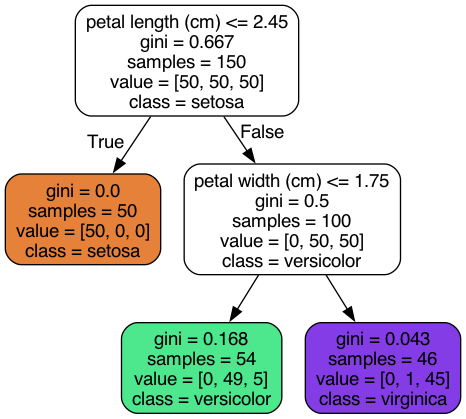

In [30]:
# open image with PIL
from PIL import Image
from IPython.display import display
image = Image.open("iris_tree.png")
#image.show()
display(image)

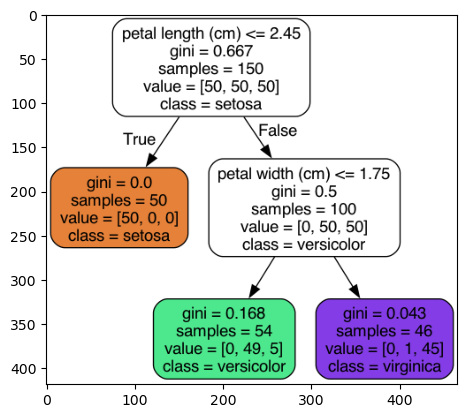

In [31]:
# open image with matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('iris_tree.png')
imgplot = plt.imshow(img)

### Visualization: plot_tree

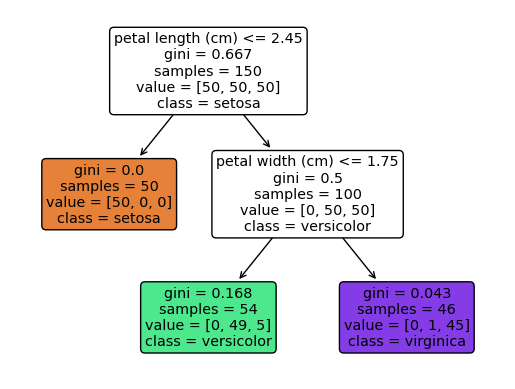

In [32]:
# visualize using the 'plot_tree' method (from the sklearn.tree module)
from sklearn.tree import plot_tree

plot = plot_tree(tree_clf, feature_names = features_names, 
                 class_names = target_names, 
                 filled=True, rounded=True)

Compute the predictions of a decision tree classifier on a test set and calculate all the classification metrics you know:


In [33]:
# split in train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(120, 2) (30, 2)


In [34]:
# fit classifier with max_depth=2
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix , ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline



def fit_model(model_pipeline, X_train, y_train, X_test):
    model_pipeline.fit(X_train,y_train)
    y_test_pred = model_pipeline.predict(X_test)
    return y_test_pred

def metrics(y_test, y_test_pred):
    f1 = f1_score(y_test, y_test_pred, average='macro')
    accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred, average='macro')
    precision =  precision_score(y_test, y_test_pred, average='macro') 
    print("\nMetrics:")
    print("F1:", f1,"\nAccuracy:",accuracy,'\nrecall:',recall,'\nprecision',precision)
    return f1, accuracy, recall, precision

def plot_confusion_matrix(y_test,y_test_pred):
    cm = confusion_matrix(y_test,y_test_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_names)
    plt.figure(figsize = (6,5))
    cm_display.plot()
    return cm

max_depth = 2

tree_clf_pipeline = Pipeline([
    #("processor",transform_pipeline),
    ("model", DecisionTreeClassifier(random_state=42,max_depth=max_depth))    
])


In [35]:
# make predictions on the test set
tree_clf_pipeline.fit(X_train,y_train)
y_test_pred_tree = fit_model(tree_clf_pipeline,X_train,y_train,X_test)



Metrics:
F1: 0.9658994032395567 
Accuracy: 0.9666666666666667 
recall: 0.9629629629629629 
precision 0.9722222222222222
Train accuracy: 0.95
Test accuracy: 0.9666666666666667


<Figure size 600x500 with 0 Axes>

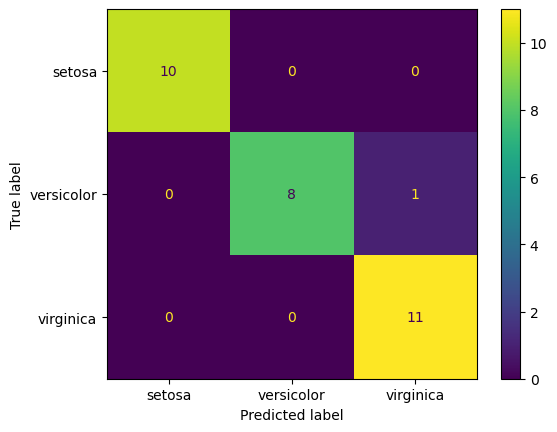

In [36]:
# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score

scores_tree = metrics(y_test, y_test_pred_tree) 
cm_tree = plot_confusion_matrix(y_test,y_test_pred_tree)

print("Train accuracy:", tree_clf_pipeline.score(X_train, y_train))
print("Test accuracy:", tree_clf_pipeline.score(X_test, y_test))


## Random forests

Explain here how they work in your own words:

In [37]:
# fit a Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier
max_depth = 2

randForest_clf_pipeline = Pipeline([
    #("processor",transform_pipeline),
    ("model", RandomForestClassifier(n_estimators=1000, max_depth=max_depth, random_state=5))    
])


In [38]:
# make predictions on the test set
#randForest_clf_pipeline.fit(X_train,y_train)
y_test_pred = fit_model(randForest_clf_pipeline,X_train,y_train,X_test)
print("Train accuracy:", randForest_clf_pipeline.score(X_train, y_train))
print("Test accuracy:", randForest_clf_pipeline.score(X_test, y_test))


Train accuracy: 0.9416666666666667
Test accuracy: 1.0



Metrics:
F1: 1.0 
Accuracy: 1.0 
recall: 1.0 
precision 1.0


<Figure size 600x500 with 0 Axes>

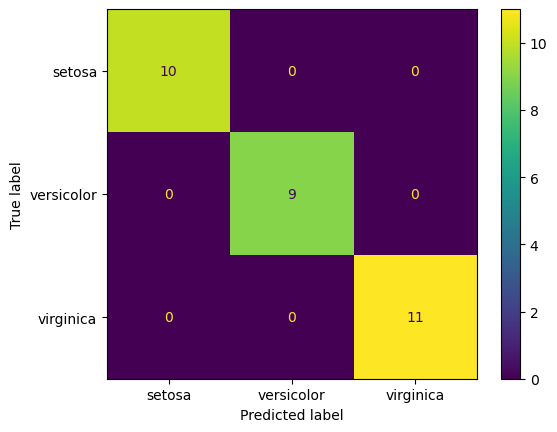

In [39]:
# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score

scores = metrics(y_test,y_test_pred)
cm = plot_confusion_matrix(y_test,y_test_pred)

## SVM

Explain here how they work in your own words:

In [40]:
# Book example SVM: iris dataset
from sklearn.svm import SVC

svc_clf_pipeline = Pipeline([
    #("processor",transform_pipeline),
    ("model", SVC(kernel='rbf'))    
])

In [41]:
# fit a linear SVM classifier

svc_clf_pipeline.fit(X_train,y_train)
y_test_pred = fit_model(svc_clf_pipeline,X_train,y_train,X_test)


In [42]:
# make predictions on the test set


Metrics:
F1: 1.0 
Accuracy: 1.0 
recall: 1.0 
precision 1.0


<Figure size 600x500 with 0 Axes>

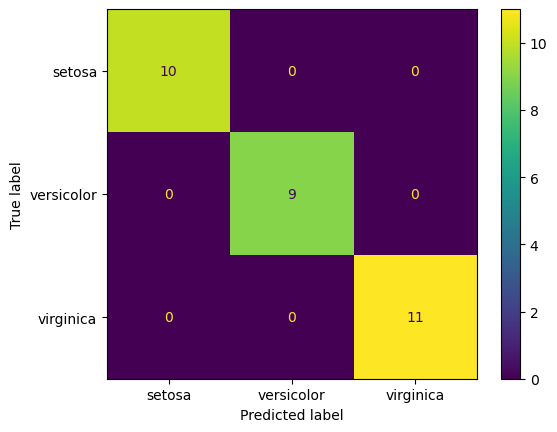

In [43]:
# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score

scores = metrics(y_test,y_test_pred)
cm = plot_confusion_matrix(y_test,y_test_pred)

## Learning curves

### Book example

In [44]:
# Book Dataset p. 128


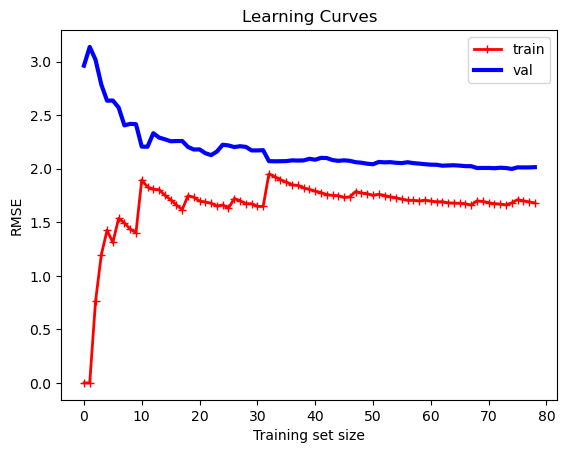

In [45]:
# Implement the book’s code on learning curves on the data he has used.
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

lin_reg = LinearRegression()

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))


    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title("Learning Curves")
    plt.legend()


m = 100
X_temp = 6 * np.random.rand(m, 1) - 3
y_temp = 0.5 * X_temp**2 + X_temp + 2 + np.random.randn(m, 1)

plot_learning_curves(lin_reg, X_temp, y_temp)


Change the method so that instead of having an incremental training set size going from 1 to the size of X_train, you have a fixed set of training sizes.
For example: 

training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

or 

training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]

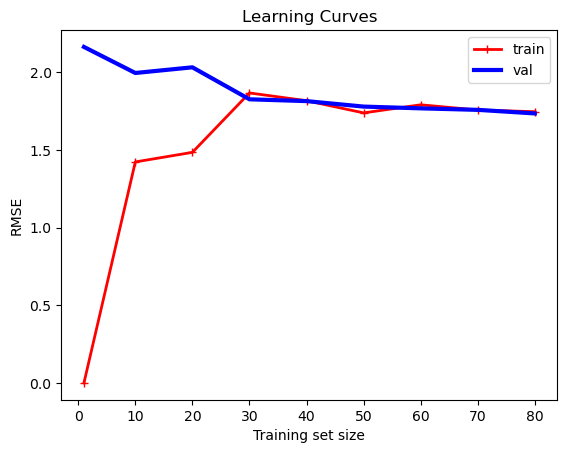

In [46]:
# Method that plots learning curves for a given estimator and training_set_sizes

def your_method_name_for_plotting_learning_curves(model, X, y):
   X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
   train_errors, val_errors = [], []
   training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]
   for m in training_set_sizes:
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
   plt.plot(training_set_sizes,np.sqrt(train_errors), "r-+", linewidth=2, label="train")
   plt.plot(training_set_sizes,np.sqrt(val_errors), "b-", linewidth=3, label="val")
   plt.xlabel("Training set size")
   plt.ylabel("RMSE")
   plt.title("Learning Curves")
   plt.legend()

your_method_name_for_plotting_learning_curves(lin_reg, X_temp, y_temp)


In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

## Learning curves for classifiers

Implement a ML problem on a dataset you have already seen in the course. 

Produce a plot of a model which shows signs of underfitting, and one that shows signs of overfitting.

In [48]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


def plot_learning_curve(estimator_class, X, y,
                         train_sizes=np.linspace(0.1, 1.0, 5)):

    #names
    categorical_features = X.select_dtypes(include="object").columns
    num_features = X.select_dtypes(exclude="object").columns

    # Pipelines
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', StandardScaler())
    ])

    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    transform_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, categorical_features)
    ])

    # Split train/test
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    train_errors, val_errors = [], []
    sizes = []

    for size in train_sizes:
        m = int(size * len(X_train))
        sizes.append(m)

        # Build a new pipeline for each subset
        model_pipeline = Pipeline([
            ("processor", transform_pipeline),
            ("model", estimator_class)
        ])

        # Fit on the first m samples — keep DataFrame, not NumPy slice
        model_pipeline.fit(X_train.iloc[:m, :], y_train.iloc[:m])

        y_train_predict = model_pipeline.predict(X_train.iloc[:m, :])
        y_val_predict = model_pipeline.predict(X_val)

        train_errors.append(mean_squared_error(y_train.iloc[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    # Plot
    plt.plot(sizes, np.sqrt(train_errors), "r-+", linewidth=2, label="Train RMSE")
    plt.plot(sizes, np.sqrt(val_errors), "b-", linewidth=3, label="Validation RMSE")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title("Learning Curves")
    plt.legend()
    plt.show()



#def plot_learning_curve(estimator, num_features, categorical_features, X, y, axes=None, ylim=None, cv=None,
#                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
   
# create your method to plot your learning curves using the sklearn method learning_curve()
    

## Decision trees learning curves

In [63]:
# import the dataset you want

# Load dataset
diabetes = datasets.load_diabetes()
X = diabetes.data #[:, 2:] 
y = diabetes.target

features_names = diabetes.feature_names
#target_names = diabetes.target_names

X = pd.DataFrame(X, columns=features_names)
y = pd.Series(y)
print(diabetes.DESCR)
# check if the data is balanced

#print(X)
#pd.Series(y).value_counts()


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

(442, 10)


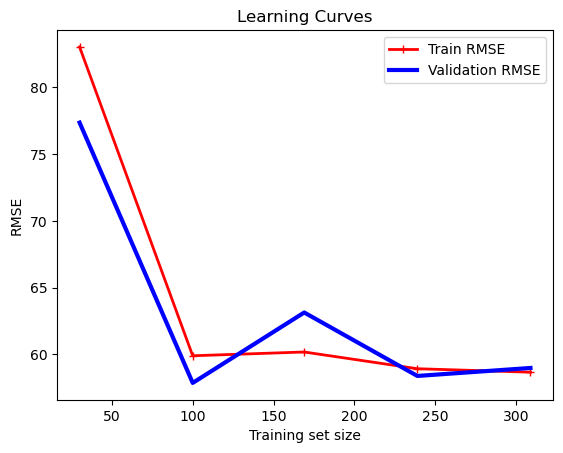

In [ ]:
# Underfit model
from sklearn.tree import DecisionTreeRegressor
print(X.shape)
# Train a decision tree with max_depth=2
estimator_class = DecisionTreeRegressor(max_depth=2, min_samples_split=50, max_features=6,
                                      random_state=42)

plot_learning_curve(estimator_class, X, y,
                     train_sizes=np.linspace(0.1, 1.0, 5))

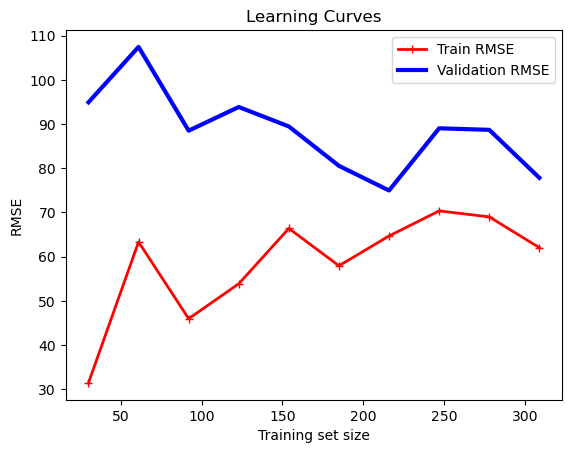

In [ ]:
# Overfit model
# Train a decision tree with max_depth=10

estimator_class = DecisionTreeClassifier(max_depth=12, 
                                         min_samples_split=2, 
                                         min_samples_leaf=1,
                                         max_features=None,
                                         random_state=42)

plot_learning_curve(estimator_class, X, y,
                         train_sizes=np.linspace(0.1, 1.0, 10))


### do all the pre-rpocessing that is needed
#Select the year columns (y variable that should be predected)
df_arbres = pd.read_pickle("/Users/sousaal/work/campus_numerique/Machine_Learning/ML1-Intro/data/arbres_grenoble.pkl")

y = df_arbres["anneedeplantation"]

X = df_arbres.drop(columns='anneedeplantation',axis=1)

estimator_class = DecisionTreeRegressor(max_depth=2, min_samples_split=50, max_features=4,
                                      random_state=42)


plot_learning_curve(estimator_class, X, y,
                     train_sizes=np.linspace(0.1, 1.0, 10))


estimator_class = DecisionTreeClassifier(max_depth=10, 
                                         min_samples_split=2, 
                                         min_samples_leaf=1,
                                         max_features=None,
                                         random_state=42)

plot_learning_curve(estimator_class, X, y,
                         train_sizes=np.linspace(0.01, 1.0, 20))



## Random forests classifier learning curves

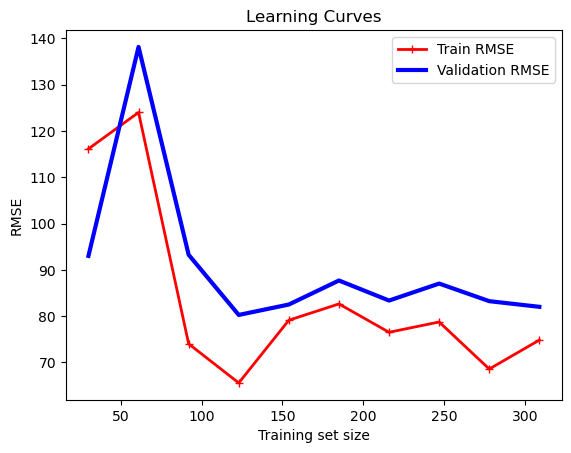

In [64]:
# Underfit model
estimator_class = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_split=50, max_features=4,
                                      random_state=42)


plot_learning_curve(estimator_class, X, y,
                     train_sizes=np.linspace(0.1, 1.0, 10))


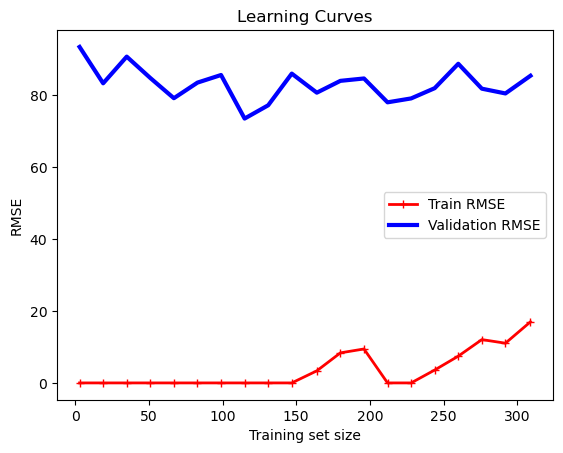

In [65]:
# Overfit model
estimator_class = RandomForestClassifier(n_estimators=500,
                                         max_depth=10, 
                                         min_samples_split=2, 
                                         min_samples_leaf=1,
                                         max_features=None,
                                         random_state=42)

plot_learning_curve(estimator_class, X, y,
                         train_sizes=np.linspace(0.01, 1.0, 20))

## SVM

SVM Advantages:

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have good generalization in practice, the risk of over-fitting is less in SVM.

SVM Disadvantages:

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

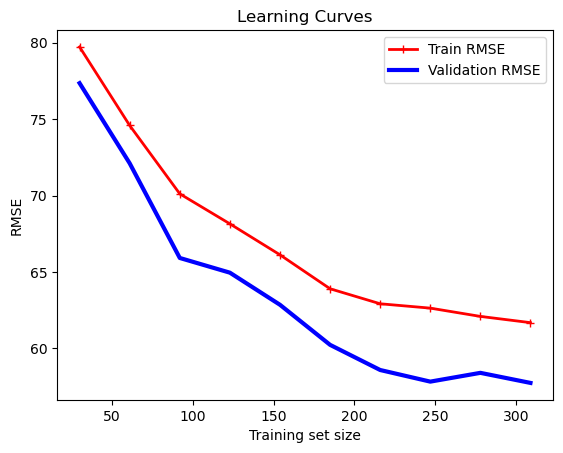

In [ ]:
# Underfit model?
from sklearn.svm import SVR
estimator_class = SVR(C=0.1, kernel='linear')

#Low C - model is too rigid

#High epsilon - ignores small errors

#Result: Both training and test errors are high - underfit


plot_learning_curve(estimator_class, X, y,
                     train_sizes=np.linspace(0.1, 1.0, 10))

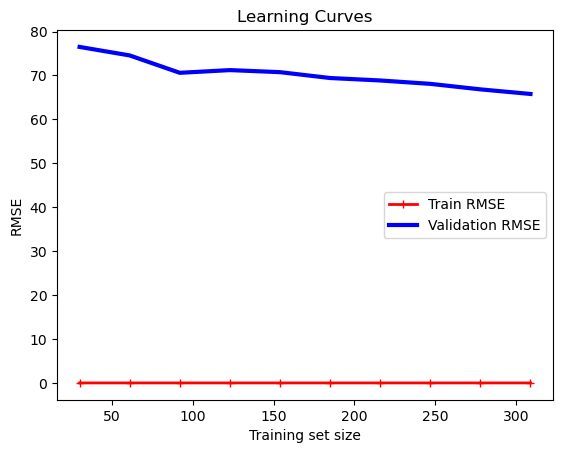

In [ ]:
# Overfit model?

estimator_class = SVR(C=1000, kernel='rbf', gamma=1.0, epsilon=0.01)

#High C - model tries to fit all points
#High gamma - very flexible kernel
#Low epsilon - fits closely to training data
#Result - Training error very low, test error high - overfit

plot_learning_curve(estimator_class, X, y,
                     train_sizes=np.linspace(0.1, 1.0, 10))


## Validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters. They are complementaru of GridSearch and make for a very nice visual tool for ypur algorithm optimization. 


In [82]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator_class, X, y, cv=None, n_jobs=None, param_range=None, param_name=None):

    # create your method to plot your learning curves using the sklearn method validation_curve()

   #features names
    categorical_features = X.select_dtypes(include="object").columns
    num_features = X.select_dtypes(exclude="object").columns

    # Pipelines
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', StandardScaler())
    ])

    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    transform_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, categorical_features)
    ])

    model_pipeline = Pipeline([
            ("processor", transform_pipeline),
            ("model", estimator_class)
        ])

    # Split train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
   
# Compute validation curve
    train_scores, val_scores = validation_curve(model_pipeline, X_train, y_train, param_name=param_name,
     param_range=param_range,
     cv=cv,
     scoring="neg_mean_squared_error",  # can use r2 or others
     n_jobs=n_jobs
    )

# Convert negative MSE to RMSE
    train_rmse = np.sqrt(-train_scores)
    val_rmse = np.sqrt(-val_scores)

# Plot
    plt.figure(figsize=(8,5))
    plt.semilogx(param_range, train_rmse.mean(axis=1), label="Training RMSE", marker='o')
    plt.semilogx(param_range, val_rmse.mean(axis=1), label="Validation RMSE", marker='o')
    plt.xlabel(param_name)
    plt.ylabel("RMSE")
    plt.title("Validation Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    return

Plot the validation curves for a chosen algorithm and vary 1 or 2 parameters of your choice.

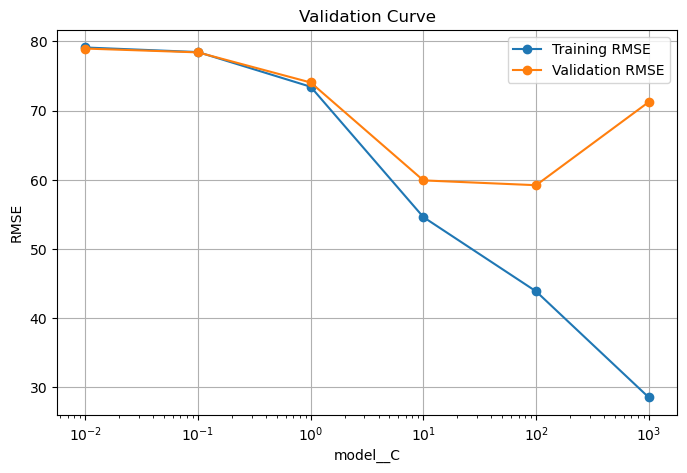

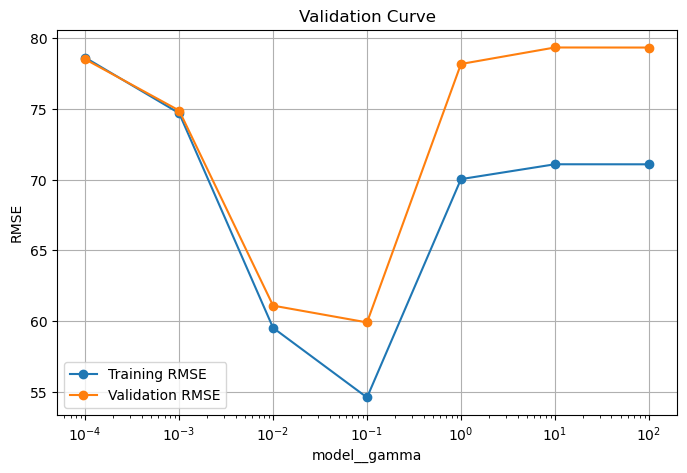

In [88]:
#C (Regularization)
param_range = np.logspace(-2, 3, 6)  # C = 0.01, 0.1, 1, 10, 100, 1000
param_name = "model__C"

estimator_class = SVR(kernel='rbf', gamma=0.1, epsilon=0.1)

plot_validation_curve(estimator_class, X, y, cv=5, n_jobs=-1, param_range=param_range, param_name=param_name)

#gamma ()
param_range = np.logspace(-4, 2, 7)  # gamma = 0.01, 0.1, 1, 10
param_name = "model__gamma"

estimator_class = SVR(kernel='rbf', C=10, epsilon=0.1)

plot_validation_curve(estimator_class, X, y, cv=5, n_jobs=-1, param_range=param_range, param_name=param_name)

Do a GridSearch and see if the most optimal parameter is coherent with what you see on your validation curves